# Laksmi Dyah Nurlita
# 21110023

**DECISION TREE**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#load data
iris = load_iris()
features = pd.DataFrame(iris.data) #x
labels = pd.DataFrame(iris.target) #y

In [ ]:
#Train test split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, train_size = 0.4, random_state = 0)

print(features.shape)
print(labels.shape)

(150, 4)
(150, 1)


Output: features memiliki 150 kolom dan 4 baris, labels memiliki 150 kolom dan 1 baris

In [ ]:
#Menggunakan 'entropy'
clf = DecisionTreeClassifier(criterion = 'entropy') #lbh kompleks dr pd gini
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2]


In [ ]:
#Menghitung akurasi
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test, pred)
print(accuracy)

0.9666666666666667


Output: diperoleh nilai akurasi dari Decision Tree sebesar 96,7%

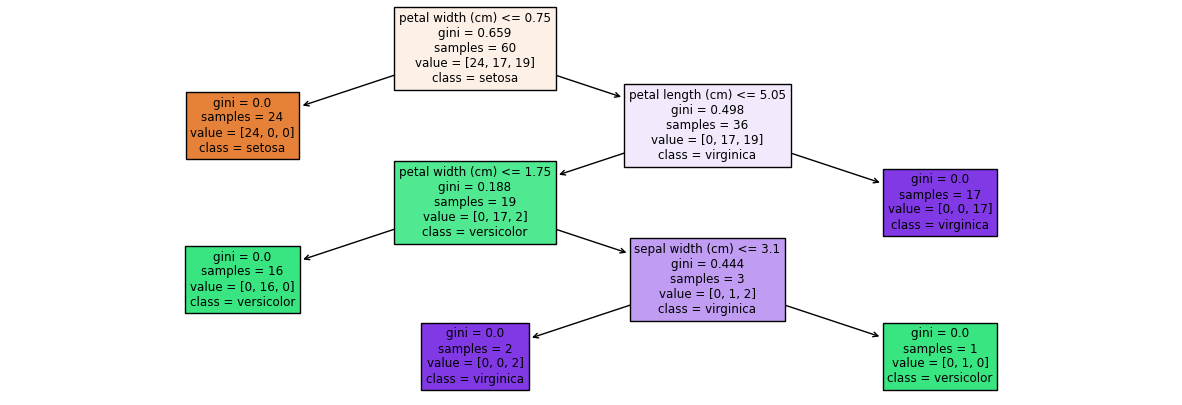

In [ ]:
#Visualisasi hasil
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize = (15, 5))
tree.plot_tree(clf, feature_names = iris.feature_names, class_names = iris.target_names, filled = True)

plt.show()

In [ ]:
#Menggunakan 'gini'
clf = DecisionTreeClassifier(criterion = 'gini') #lbh sederhana
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test, pred)
print(accuracy)

0.9666666666666667


**KNN**

In [ ]:
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 64.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939433 sha256=4008157f9c5191c37b38dd493141ee3a671a355b9b84c021967dd39624cb2644
  Stored in directory: /root/.cache/pip/wheels/6b/86/a7/f71cb84c7bff804d83e293615a20c0531234397b796aee2645
Successfully built pydataset


In [ ]:
from pydataset  import data
import numpy as np

Load Data

In [ ]:
df = data('turnout')

In [ ]:
df.head()

,race,age,educate,income,vote
1,white,60,14.0,3.3458,1
2,white,51,10.0,1.8561,0
3,white,24,12.0,0.6304,0
4,white,38,8.0,3.4183,1
5,white,25,12.0,2.7852,1


In [ ]:
#Split data
from sklearn.model_selection import train_test_split

x = df[['age', 'income', 'vote']]
y = df['educate']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

Train dan Test Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#Training model menggunakan k atau n_neighbor = 11
knn_r = KNeighborsRegressor(n_neighbors = 11)
knn_r.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
y_pred = knn_r.predict(x_test)

Evaluasi Model Regresi

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Mean Squared Eror
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

#Root mean Squared Error
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

#R-Squared Score
r2 = r2_score(y_test, y_pred)
print('R-Squared Score: ', r2)

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('MAE: ', mae)

MSE:  9.24720385674931
RMSE:  3.0409215472861693
R-Squared Score:  0.20838330911777625
MAE:  2.352121212121212


Output: diperoleh hasil Mean Squared Error sebesar 9.247, Root Squared Error sebesar 3.04, R-Squared sebesar 0.208, dan Mean Absolute Error sebesar 2.35

Mencari k Terbaik scr Manual

In [ ]:
mse_val = []
k = []

#looping untuk train model menggunakan k atau n_neighbor 1-50
for i in range(1, 51):
  k.append(i)
  #Train Model
  knn_r = KNeighborsRegressor(i)
  knn_r.fit(x_train, y_train)
  #Prediksi
  y_pred = knn_r.predict(x_test)
  #Evaluasi
  mse = mean_squared_error(y_test, y_pred)
  #Menyimpan Nilai MSE
  mse_val.append(mse)
  print('n_neighbour = ' + str(i) + 'MSE = ' + str(mse))

n_neighbour = 1MSE = 16.967916666666667
n_neighbour = 2MSE = 12.565625
n_neighbour = 3MSE = 10.867037037037038
n_neighbour = 4MSE = 10.651119791666666
n_neighbour = 5MSE = 10.189533333333332
n_neighbour = 6MSE = 9.790925925925924
n_neighbour = 7MSE = 9.700119047619047
n_neighbour = 8MSE = 9.437506510416666
n_neighbour = 9MSE = 9.316409465020575
n_neighbour = 10MSE = 9.278187500000001
n_neighbour = 11MSE = 9.24720385674931
n_neighbour = 12MSE = 9.298504050925926
n_neighbour = 13MSE = 9.228111439842209
n_neighbour = 14MSE = 9.19452593537415
n_neighbour = 15MSE = 9.144729629629632
n_neighbour = 16MSE = 9.0964501953125
n_neighbour = 17MSE = 9.06103950403691
n_neighbour = 18MSE = 9.007685185185185
n_neighbour = 19MSE = 8.984549861495847
n_neighbour = 20MSE = 8.985777083333332
n_neighbour = 21MSE = 8.932414965986395
n_neighbour = 22MSE = 8.909488636363637
n_neighbour = 23MSE = 8.926026307498425
n_neighbour = 24MSE = 8.897770543981482
n_neighbour = 25MSE = 8.90592
n_neighbour = 26MSE = 8.8136

Text(0.5, 1.0, 'MSE Vs k')

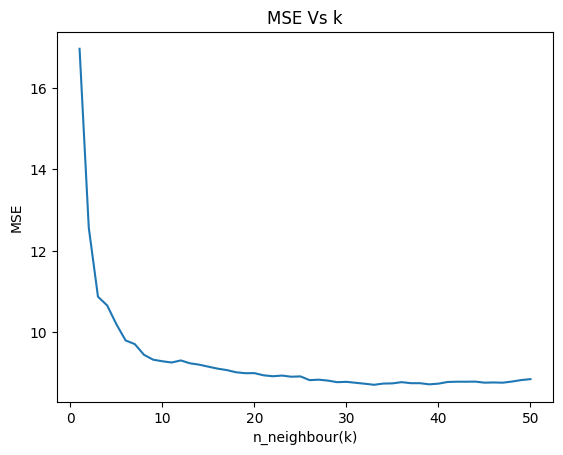

In [ ]:
#Viasualisasi hasil MSE 
plt.plot(k, mse_val)
plt.xlabel('n_neighbour(k)')
plt.ylabel('MSE')
plt.title('MSE Vs k')